In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from train import NetSolver
import matplotlib.pyplot as plt

In [2]:
tensor_cifar10=torchvision.datasets.CIFAR10('./CIFAR10/',train=True,download=True,transform=transforms.ToTensor())

Files already downloaded and verified


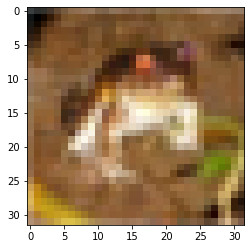

6


In [3]:
img,label=tensor_cifar10[0] # C*H*W
plt.imshow(img.permute(1,2,0))
plt.show()
print(label)

In [4]:
imgs=torch.stack([img for img,_ in tensor_cifar10],dim=3) # 堆叠图片
imgs.shape

torch.Size([3, 32, 32, 50000])

In [5]:
# 计算平均值
imgs.view(3,-1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [6]:
# 计算标准差
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [7]:
batch_size=128
# Compose(list of Transform objects):composes several transforms together. 
# Normalize变换
# Resize():Resize the input image to the given size. If the image is torch Tensor, it is expected to have […, H, W]
# CenterCrop():Crops the given image at the center.If image size is smaller than output size along any edge, 
# image is padded with 0 and then center cropped.
# RandomHorizontalFlip():Horizontally flip the given image randomly with a given probability(p=0.5)
# TenCrop():Crop the given image into four corners and the central crop plus the flipped version of these 
# (horizontal flipping is used by default). 
train_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop(256), transforms.RandomCrop(224), transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2470, 0.2435, 0.2616])])

valid_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop(256), transforms.RandomCrop(224),transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2470, 0.2435, 0.2616])
    ])

train_data=torchvision.datasets.CIFAR10('./CIFAR10/',train=True,download=True,transform=train_transform)
train_loader=torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True,num_workers=4,pin_memory=True)
# num_workers:how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process. (default: 0)
# pin_memory:If True, the data loader will copy Tensors into CUDA pinned memory before returning them. 
valid_data=torchvision.datasets.CIFAR10('./CIFAR10/',train=False,download=True,transform=valid_transform)
valid_loader=torch.utils.data.DataLoader(valid_data,batch_size=batch_size,shuffle=False,num_workers=4,pin_memory=True)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
class_number=10
epochs=200
learning_rate=0.01
momentum = 0.9
weight_decay = 0.0005

In [9]:
AlexNet=NetSolver(class_number=class_number)

In [10]:
AlexNet.train(trainsets=train_loader,validsets=valid_loader,epochs=epochs,
            batch_size=batch_size,learning_rate=learning_rate,momentum=momentum, weight_decay=weight_decay)

Saved best model,best_acc = 10.328000
Saved best model,best_acc = 10.636000
Saved best model,best_acc = 10.990000
Saved best model,best_acc = 12.180000
Saved best model,best_acc = 13.748000
Saved best model,best_acc = 15.328000
Saved best model,best_acc = 16.938000
Saved best model,best_acc = 20.608000
Saved best model,best_acc = 28.170000
Saved best model,best_acc = 31.378000
Saved best model,best_acc = 34.224000
Saved best model,best_acc = 36.924000
Saved best model,best_acc = 38.830000
Saved best model,best_acc = 40.654000
Saved best model,best_acc = 41.712000
Saved best model,best_acc = 44.226000
Saved best model,best_acc = 46.392000
Saved best model,best_acc = 49.270000
Saved best model,best_acc = 51.116000
Saved best model,best_acc = 52.798000
Saved best model,best_acc = 53.954000
Saved best model,best_acc = 55.438000
Saved best model,best_acc = 57.196000
Saved best model,best_acc = 57.810000
Saved best model,best_acc = 59.070000
Saved best model,best_acc = 60.102000
Saved best m

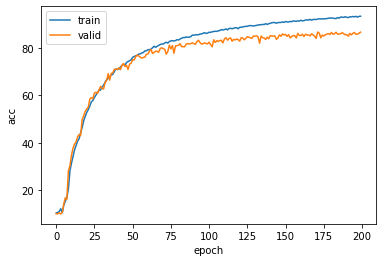

In [15]:
plt.xlabel('epoch')
plt.ylabel('acc')
plt.plot(AlexNet.train_acc,label='train')
plt.plot(AlexNet.valid_acc,label='valid')
plt.legend()
plt.show()